Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [ ]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2433, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2433 (delta 0), reused 3 (delta 0), pack-reused 2428
Receiving objects: 100% (2433/2433), 8.13 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (1561/1561), done.


In [11]:
import matplotlib.pyplot as plt
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

FileNotFoundError: [Errno 2] No such file or directory: 'pytorch-CycleGAN-and-pix2pix/'

In [ ]:
# !pip install -r requirements.txt

     |████████████████████████████████| 676 kB 8.0 MB/s 
     |████████████████████████████████| 1.7 MB 33.3 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 180 kB 41.8 MB/s 
     |████████████████████████████████| 139 kB 44.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=59ceb67e09ff212ce5c887257497b45e8954b8f47909dd22fe5bfa686238f23c
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=5387759566d16a9c2f0139598b391d73b78f748514544c7c19e951d1c02a87c2
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl 

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

Output streaming troncato alle ultime 5000 righe.
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 19:25:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 16:54:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 19:43:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-26 21:18:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-19 15:39:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-13 21:21:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-04 14:10:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-18 12:46:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-17 18:07:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-24 17:24:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-27 12:45:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-14 05:57:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-24 01:48:36.jpg  
  inflating: ./datasets/van

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [7]:
!bash ./scripts/download_cyclegan_model.sh style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
for details.

--2021-12-13 16:23:18--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43,46M  1,11MB/s    in 35s     

2021-12-13 16:23:53 (1,23 MB/s) - ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’ saved [45575747/45575747]

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [13]:
!python test.py --dataroot datasets/vangogh2photo/testB --name style_vangogh_pretrained --model test --no_dropout --num_test 751 --direction BtoA

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/vangogh2photo/testB  	[default: None]
             dataset_mode: single                        
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

processing (0295)-th image... ['datasets/vangogh2photo/testB/2014-10-11 08:08:42.jpg']
processing (0300)-th image... ['datasets/vangogh2photo/testB/2014-10-12 11:25:09.jpg']
processing (0305)-th image... ['datasets/vangogh2photo/testB/2014-10-13 12:25:45.jpg']
processing (0310)-th image... ['datasets/vangogh2photo/testB/2014-10-14 21:57:09.jpg']
processing (0315)-th image... ['datasets/vangogh2photo/testB/2014-10-16 10:54:41.jpg']
processing (0320)-th image... ['datasets/vangogh2photo/testB/2014-10-17 16:22:02.jpg']
processing (0325)-th image... ['datasets/vangogh2photo/testB/2014-10-18 23:18:04.jpg']
processing (0330)-th image... ['datasets/vangogh2photo/testB/2014-10-19 20:06:07.jpg']
processing (0335)-th image... ['datasets/vangogh2photo/testB/2014-10-20 11:13:30.jpg']
processing (0340)-th image... ['datasets/vangogh2photo/testB/2014-10-21 10:15:16.jpg']
processing (0345)-th image... ['datasets/vangogh2photo/testB/2014-10-21 23:44:54.jpg']
processing (0350)-th image... ['datasets/va

# Visualize

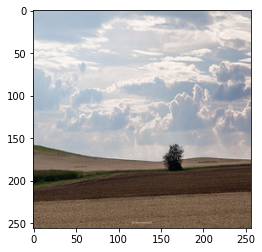

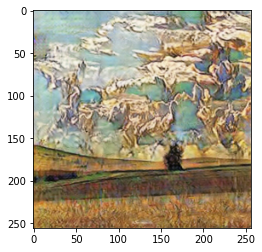

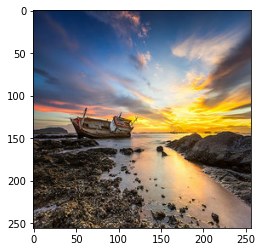

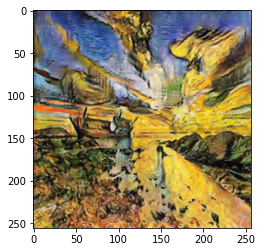

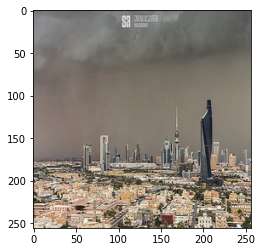

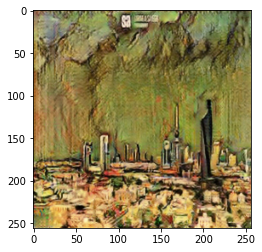

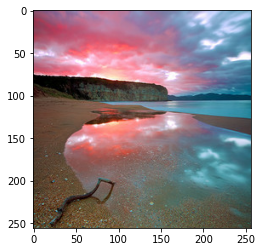

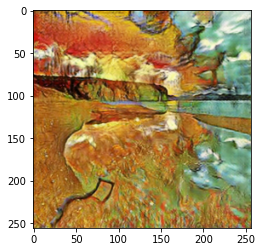

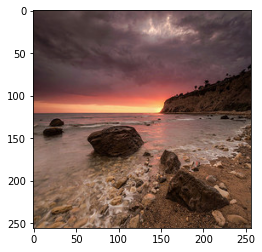

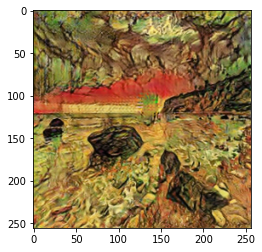

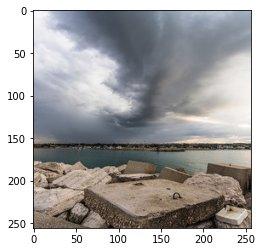

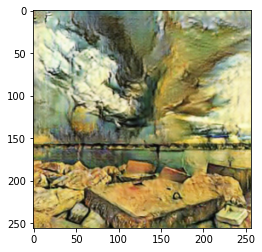

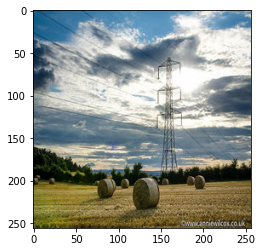

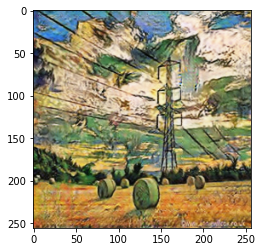

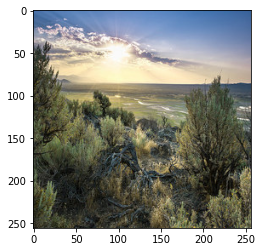

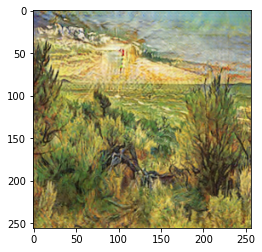

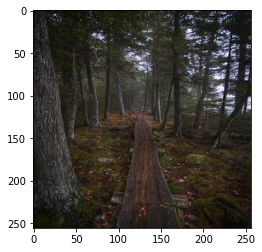

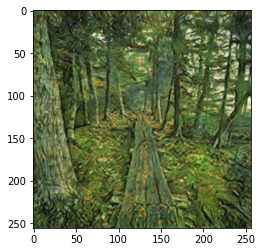

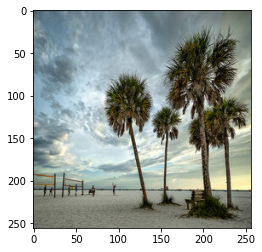

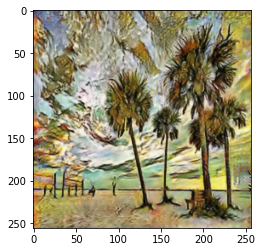

In [15]:
results_dir = "./results/style_vangogh_pretrained/test_latest/images"

fake_images = [x for x in os.listdir(results_dir) if 'fake' in x]
real_images = [x for x in os.listdir(results_dir) if 'real' in x]

fake_images.sort()
real_images.sort()

for i in range(10, 20):
    # display real image
    img = plt.imread(os.path.join(results_dir, real_images[i]))
    plt.imshow(img)
    plt.show()

    # display fake image
    img = plt.imread(os.path.join(results_dir, fake_images[i]))
    plt.imshow(img)
    plt.show()